# Linear Regression Method

References:

- https://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html#cost-function
- https://www.statisticshowto.com/probability-and-statistics/regression-analysis/find-a-linear-regression-equation/

## 1. Introduction

Linear regression is a method to predict the expectation result/target (Y) based on an initial model and a sample feature (X) that we have. The initial models are called coefficient/slope (m) and intercept (b). This relationship can be written as Equation 1 below

$
Y = mX + b
$

which means, that X is the independent variable and Y is the dependent variable have a linear relationship. If the X increase then the Y increase too. To do this, we have to calculate the coefficient and intercept values first. The calculation of these values can be used by the Gradient Descent algorithm. The Gradient Descent algorithm is estimated from the Cost Function or Error Function. The coefficient and intercept will be obtained when the Cost Function reaches the minimum value through the number of iterations. The Cost Function itself can be written as Equation 2 below

**Cost Function**

$
MSE = {1 \over N} \Sigma_{i=1}^{n} (y_i - (mx_i + b))^2
$

where MSE is Mean Square Error and N is number of samples/data.

To calculate the change of coefficient (m) and intercept (b) for each iteration, we take the first partial derivative of the Cost Function equation. Then, the first partial derivative for m and b can be written

**Gradient Descent**

$
{df \over dm} = {1 \over N} \Sigma -2x_i(y_i - (mx_i + b))
$

$
{df \over db} = {1 \over N} \Sigma -2(y_i - (mx_i + b))
$

Then update the m and b

$
m = m - \frac{df}{dm} . \alpha
$

$
b = b - \frac{df}{db} . \alpha
$

where the $\alpha$ is the learning rate or step size for each iteration. If alpha is small, it makes the gradient descent move smoothly. In this algorithm, the $\alpha$ and number of iterations are adjusted to 0.01 and 10000 respectively.

In [171]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression

mpl.rcParams['figure.dpi'] = 300

## 2. Create Class of Linear Regression Algorithm (Gradient Descent)

In [172]:
class LinearRegressionManual:
    def __init__(self, alpha=0.01,iteration=10000):
        self.alpha = alpha
        self.iteration = iteration

    def costFunction(self,X, Y, m, b):
        y_true = np.asarray(Y)
        # MSE (L2)
        cost = np.mean(np.sum((y_true - (m*X + b))**2))
        return cost 

    def gradient_descent(self, m, b, X, Y):
        '''
        Gradient Descent
        '''
        X = np.asarray(X)
        Y = np.asarray(Y)

        N = len(X)

        # deriv for MSE
        # calculate derivative of m
        m_deriv = (-2/N) * np.sum(X * (Y - (m*X + b)))
        # calculate derivative of b
        b_deriv = (-2/N) * np.sum(Y - (m*X + b))

        # update the coefficient and intercept
        mm = m - (m_deriv * self.alpha)
        bb = b - (b_deriv * self.alpha)

        return mm, bb
    
    def predict(self, X):
        y = self.m*X + self.b
        return y

    def fit(self,X,y):
        '''
        The linear equation 

        y = mx + b

        Input:
        X: list of data
        Y: list of data

        Output:
        predicted: list of predicted data in linear relationship
        '''

        # convert as numpy array
        X = np.asarray(X)
        Y = np.asarray(y)

        # calculate the slope/intercept
        m = 0
        b = 0

        self.costValue = []
        for i in range(self.iteration):
            costVal = self.costFunction(X,Y,m,b)
            m, b = self.gradient_descent(m,b,X,Y)
            self.costValue.append(costVal)
        
        self.m = m 
        self.b = b
    
    def r2_score(self,Y_true,Y_predictions):
        r2 = (1 - (np.sum((Y_true - Y_predictions)**2)/(np.sum((Y_true - np.mean(Y_true))**2))))
        return r2

    def plot_cost_function(self):
        fig, ax = plt.subplots()
        iter = range(0, self.iteration)
        ax.plot(iter, self.costValue)
        ax.set_xlabel('Iteration')
        ax.set_ylabel('Cost Value (Mean Square Error)')
        ax.set_title('Cost Function')
        plt.show()
    
    def plot_data(self,X,y,predictions,xlabel=None, ylabel=None):
        fig, ax = plt.subplots(figsize=(10,6))
        ax.scatter(X,y,s=0.5,c='blue')
        ax.plot(X,predictions,'red')
        if xlabel == None or ylabel == None:
            ax.set_xlabel('X')
            ax.set_ylabel('y')
        else:
            ax.set_xlabel(xlabel)
            ax.set_ylabel(ylabel)
        ax.set_title('Linear Regression')
        plt.show()
    

## 3. Create Synthetic Data

To understand the concept of linear regression, let's try to create a synthetic data that the coefficient and intercept are adjusted to be 0.8 and 0.05 respectively. The synthetic data is generated through the linear equation `y = mx + b` as follows

Text(0, 0.5, 'Y')

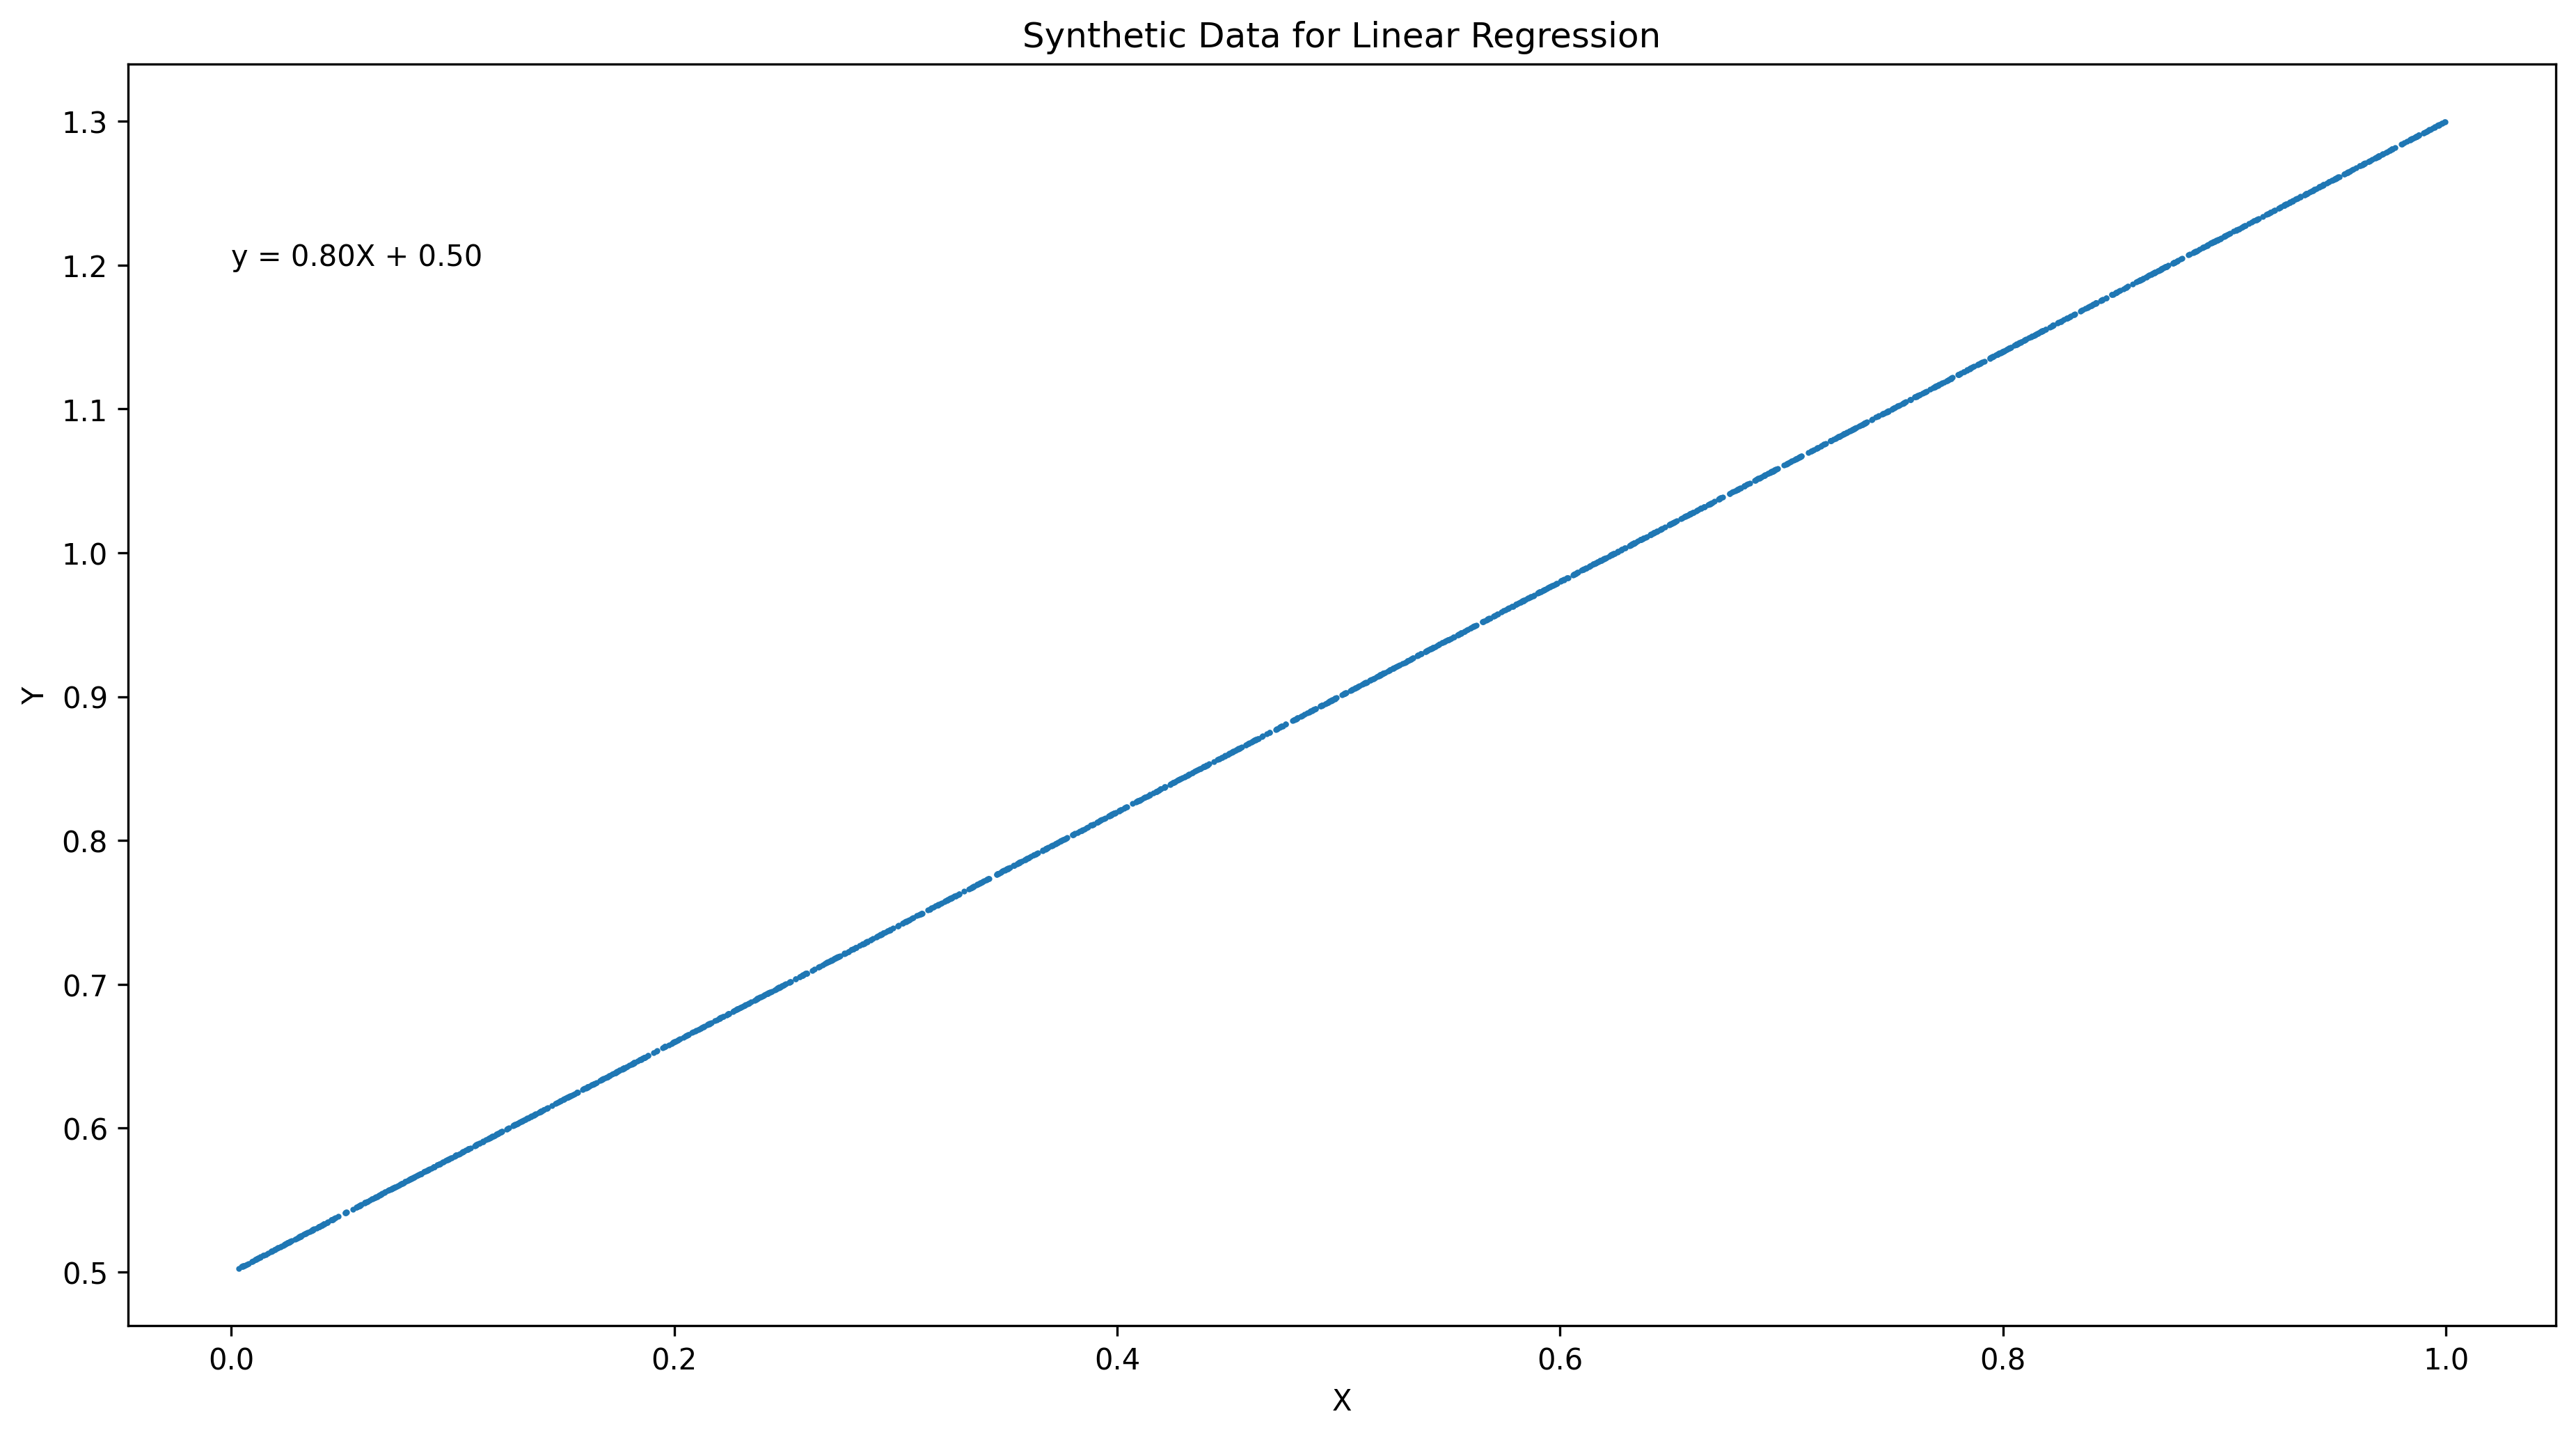

In [185]:
# synthetic data
m_synth, b_synth = 0.8, 0.5
np.random.seed(42)
feature = np.random.rand(1,2000)
target = (m_synth * feature) + b_synth

X = feature[0]
y = target[0]

eq = 'y = %.2fX + %.2f' % (m_synth, b_synth)

fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(X,y,s=1)
ax.text(0, 1.2, eq)
ax.set_title('Synthetic Data for Linear Regression')
ax.set_xlabel('X')
ax.set_ylabel('Y')

Our goal is to create a linear regression model that can be used to our future data. To do this, we have to split the data into two parts, training and testing dataset. We set 75% the training dataset and 25% the testing dataset randomly by using `train_test_split` method. We train our training dataset to get a model and thet use the training model result to testing dataset.

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

We save the training data and testing data into dataframe

In [175]:
df_train_data = pd.DataFrame(
    {
    'X_train_o': X_train.tolist(),
    'y_train_o': y_train.tolist()
    }
)

df_train_data.head()

,X_train_o,y_train_o
0,0.367759,0.794207
1,0.520308,0.916246
2,0.018391,0.514713
3,0.453790,0.863032
4,0.800357,1.140285


In [176]:
df_test_data = pd.DataFrame(
    {
    'X_test_o': X_test.tolist(),
    'y_test_o': y_test.tolist()
    }
)

df_test_data.head()

,X_test_o,y_test_o
0,0.776447,1.121158
1,0.162934,0.630348
2,0.996334,1.297067
3,0.892672,1.214137
4,0.078578,0.562863


We apply the linear regression to the training data by using two different source functions, there are `Gradient Descent` algorithm and `LinearRegression` from Scikit-Learn package

Manual

In [177]:
lrManual = LinearRegressionManual()
lrManual.fit(np.asarray(df_train_data['X_train_o']).reshape(-1,1), np.asarray(df_train_data['y_train_o']).reshape(-1,1))
m_train_manual = lrManual.m
b_train_manual = lrManual.b

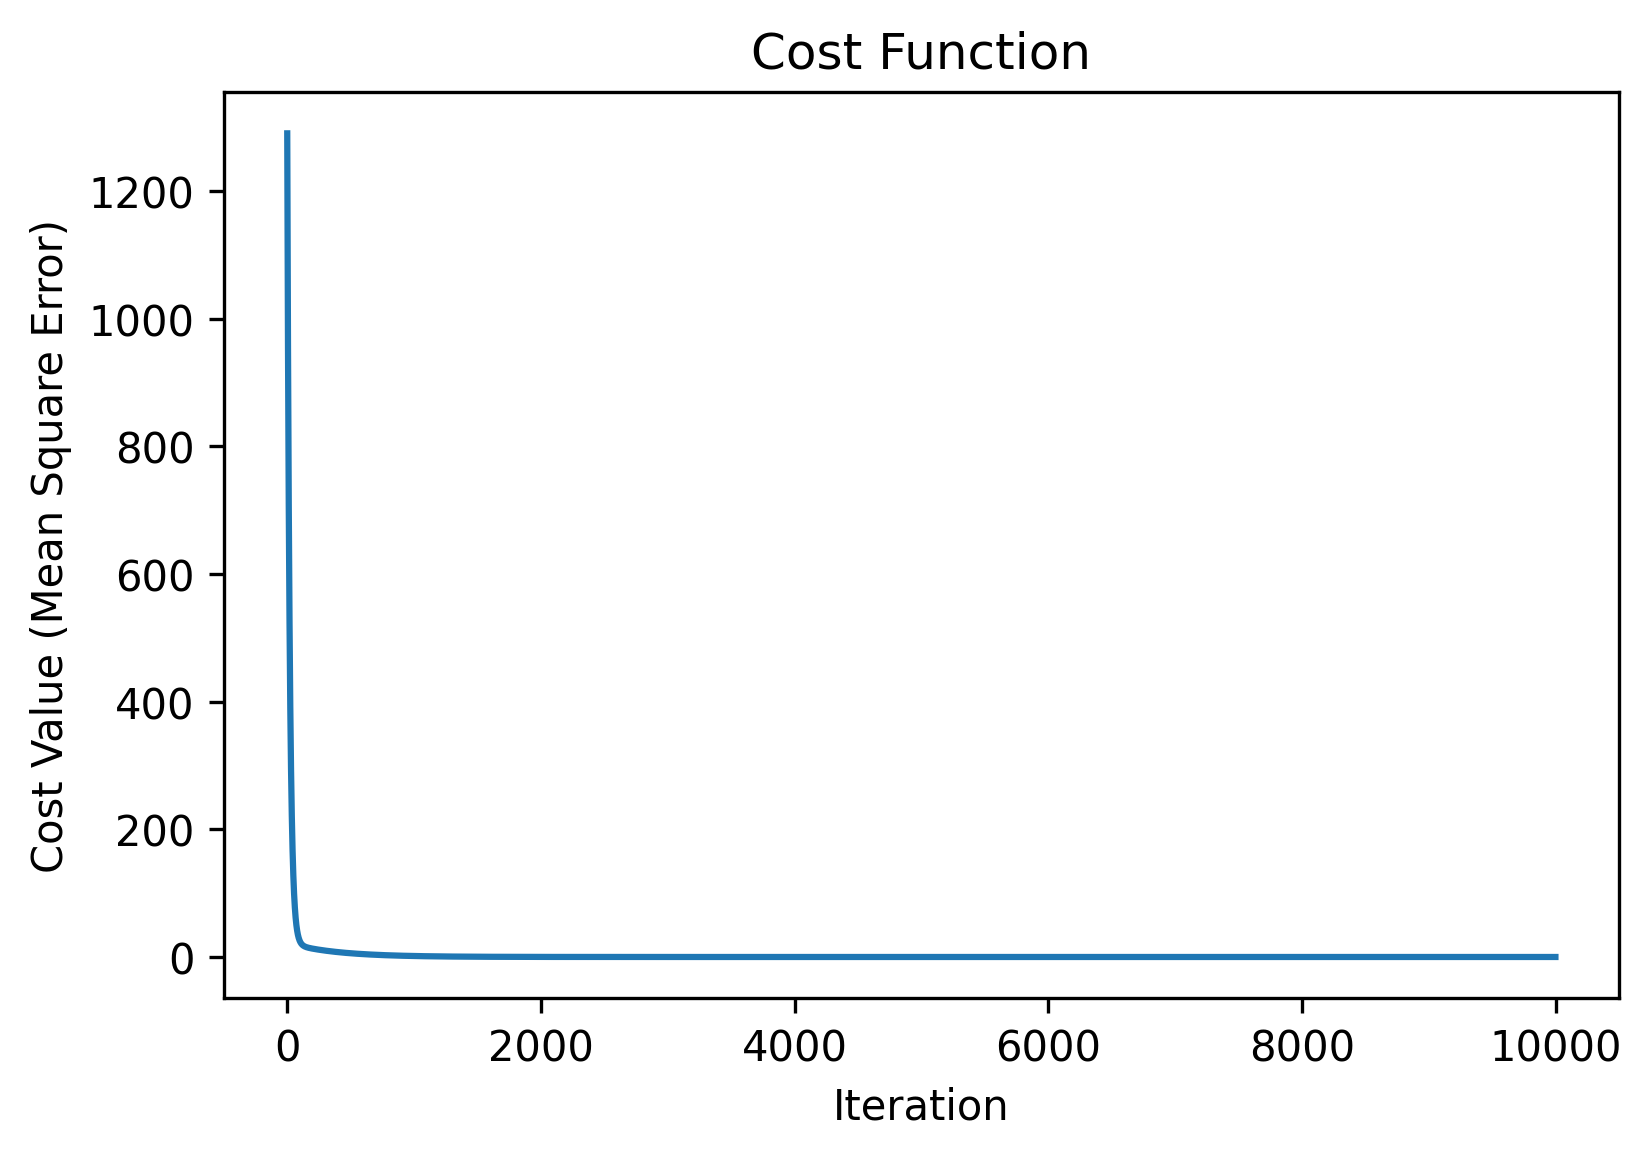

In [178]:
lrManual.plot_cost_function()

Scikit-Learn

In [179]:
lrSL = LinearRegression()
lrSL.fit(np.asarray(df_train_data['X_train_o']).reshape(-1,1), np.asarray(df_train_data['y_train_o']).reshape(-1,1))
m_train_SL = lrSL.coef_[0][0]
b_train_SL = lrSL.intercept_[0]

In [180]:
df_train_coef = pd.DataFrame(
    {
        'feature':['Feature'],
        'm_train_manual': [m_train_manual],
        'b_train_manual': [b_train_manual],
        'm_train_SL': [m_train_SL],
        'b_train_SL': [b_train_SL]
    }
)

df_train_coef.head()

,feature,m_train_manual,b_train_manual,m_train_SL,b_train_SL
0,Feature,0.799999,0.5,0.8,0.5


We have tried to create a linear regression algorithm by using `Gradient Descent` and compare its result with the Scikit-Learn's linear regression package result. We apply the linear regression into the training data. The result of `Gradient Descent` are 0.79 for the coefficient/slope and 0.5 for intercept. This algorithm gives the close approximation result to the synthetic data which are adjusted to the 0.8 for the coefficient and 0.5 for the intercept. Then, the `Gradient Descent's` result also has the close result to the Scikit-Learn's linear regression package result. By using this model, we predict the response from the testing data as an input and then compare the predicted response result to the actual response test.

Manual

In [181]:
y_predicted_manual = lrManual.predict(X_test)

comparing to the actual response test by calculating the $R^2$ score for `Gradient Descent` linear regression algorithm

In [182]:
r2_score_manual = r2_score(y_test, y_predicted_manual)
r2_score_manual

0.999999999999383

Scikit-Learn

In [183]:
y_predicted_SL = lrSL.predict(X_test.reshape(-1,1))

comparing the actual response test by calculating the $R^2$ score for Scikit-Learn's linear regression algorithm

In [184]:
r2_score_SL = r2_score(y_test, y_predicted_SL)
r2_score_SL

1.0

The prediction result from the linear regression algorithm of `Gradient Descent` has 99% correlation to the actual test dataset and the linear regression algorithm of Scikit-Learn has completely 100% match to the actual test dataset. It means, this model linear regression could be used to predict the either using Gradient Descent algorithm linear regression algorith of Scikit-Learn. Overall, this is how the linear regression works.